In [1]:
# 导入需要的模块
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#支持中文显示
plt.rcParams['font.family']='Kaiti'
# 使用非unicode的负号，当使用中文时候要设置
plt.rcParams['axes.unicode_minus']=False

### 加载数据

In [3]:
# 读取文件的数据
# 加载用户的数据
user_names = ['user_id','age','gender','occupation','zip_code']
user_df = pd.read_table('./ml-100k/u.user',sep='|',names=user_names)
user_df

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [4]:
# 加载电影的数据
movie_names = ['movie_id','movie_title','release_date','video_release','date','IMDb_URL']
movie_df = pd.read_table('./ml-100k/u.item',sep='|',names=movie_names,encoding='iso8859-1',usecols=range(6))
movie_df

,movie_id,movie_title,release_date,video_release,date,IMDb_URL
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0
...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0


In [5]:
# 加载评分的数据
data_names = ['user_id','item_id','rating','timestamp']
data_df = pd.read_table('./ml-100k/u.data',sep='\t',names=data_names)
data_df

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [6]:
# 合并数据
# 用户与评分数据合并
user_data_df = pd.merge(user_df,data_df)
# user_data_df
# 用户评分与电影数据合并
all_df = pd.merge(user_data_df,movie_df,left_on='item_id',right_on='movie_id')
all_df

,user_id,age,gender,occupation,zip_code,item_id,rating,timestamp,movie_id,movie_title,release_date,video_release,date,IMDb_URL
0,1,24,M,technician,85711,61,4,878542420,61,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...,0
1,1,24,M,technician,85711,189,3,888732928,189,"Grand Day Out, A (1992)",01-Jan-1992,NaN,http://us.imdb.com/M/title-exact?Grand%20Day%2...,0
2,1,24,M,technician,85711,33,4,878542699,33,Desperado (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Desperado%20(...,0
3,1,24,M,technician,85711,160,4,875072547,160,Glengarry Glen Ross (1992),01-Jan-1992,NaN,http://us.imdb.com/M/title-exact?Glengarry%20G...,0
4,1,24,M,technician,85711,20,4,887431883,20,Angels and Insects (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Angels%20and%...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,943,22,M,student,77841,415,1,888640027,415,"Apple Dumpling Gang, The (1975)",01-Jan-1975,NaN,http://us.imdb.com/M/title-exact?Apple%20Dumpl...,0
99996,943,22,M,student,77841,219,4,888639575,219,"Nightmare on Elm Street, A (1984)",01-Jan-1984,NaN,http://us.imdb.com/M/title-exact?Nightmare%20o...,0
99997,943,22,M,student,77841,796,3,888640311,796,Speechless (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Speechless%20...,0
99998,943,22,M,student,77841,739,4,888639929,739,Pretty Woman (1990),01-Jan-1990,NaN,http://us.imdb.com/M/title-exact?Pretty%20Woma...,0


### 数据的清洗与探索

In [7]:
# 清除无用的列
# 删除item_id 或者 movie_id 其中一个
all_df.drop(columns=['item_id'],inplace=True)
all_df

,user_id,age,gender,occupation,zip_code,rating,timestamp,movie_id,movie_title,release_date,video_release,date,IMDb_URL
0,1,24,M,technician,85711,4,878542420,61,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...,0
1,1,24,M,technician,85711,3,888732928,189,"Grand Day Out, A (1992)",01-Jan-1992,NaN,http://us.imdb.com/M/title-exact?Grand%20Day%2...,0
2,1,24,M,technician,85711,4,878542699,33,Desperado (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Desperado%20(...,0
3,1,24,M,technician,85711,4,875072547,160,Glengarry Glen Ross (1992),01-Jan-1992,NaN,http://us.imdb.com/M/title-exact?Glengarry%20G...,0
4,1,24,M,technician,85711,4,887431883,20,Angels and Insects (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Angels%20and%...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,943,22,M,student,77841,1,888640027,415,"Apple Dumpling Gang, The (1975)",01-Jan-1975,NaN,http://us.imdb.com/M/title-exact?Apple%20Dumpl...,0
99996,943,22,M,student,77841,4,888639575,219,"Nightmare on Elm Street, A (1984)",01-Jan-1984,NaN,http://us.imdb.com/M/title-exact?Nightmare%20o...,0
99997,943,22,M,student,77841,3,888640311,796,Speechless (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Speechless%20...,0
99998,943,22,M,student,77841,4,888639929,739,Pretty Woman (1990),01-Jan-1990,NaN,http://us.imdb.com/M/title-exact?Pretty%20Woma...,0


In [8]:
# 数据的清洗-缺失值、异常值、重复值
# 缺失值
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   user_id        100000 non-null  int64  
 1   age            100000 non-null  int64  
 2   gender         100000 non-null  object 
 3   occupation     100000 non-null  object 
 4   zip_code       100000 non-null  object 
 5   rating         100000 non-null  int64  
 6   timestamp      100000 non-null  int64  
 7   movie_id       100000 non-null  int64  
 8   movie_title    100000 non-null  object 
 9   release_date   99991 non-null   object 
 10  video_release  0 non-null       float64
 11  date           99987 non-null   object 
 12  IMDb_URL       100000 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 9.9+ MB


In [9]:
# 删掉没有值的列, axis=1表示列 0表示行(默认)，how='all'表示全部为空
all_df.dropna(axis=1,how='all',inplace=True)

In [10]:
# 异常值
all_df.describe()

,user_id,age,rating,timestamp,movie_id,IMDb_URL
count,100000.00000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.0000
mean,462.48475,32.969850,3.529860,8.835289e+08,425.530130,0.0001
std,266.61442,11.562623,1.125674,5.343856e+06,330.798356,0.0100
min,1.00000,7.000000,1.000000,8.747247e+08,1.000000,0.0000
25%,254.00000,24.000000,3.000000,8.794487e+08,175.000000,0.0000
50%,447.00000,30.000000,4.000000,8.828269e+08,322.000000,0.0000
75%,682.00000,40.000000,4.000000,8.882600e+08,631.000000,0.0000
max,943.00000,73.000000,5.000000,8.932866e+08,1682.000000,1.0000


In [11]:
# 重复值
all_df.duplicated(subset=['user_id','movie_id']).any()

False

<Axes: ylabel='count'>

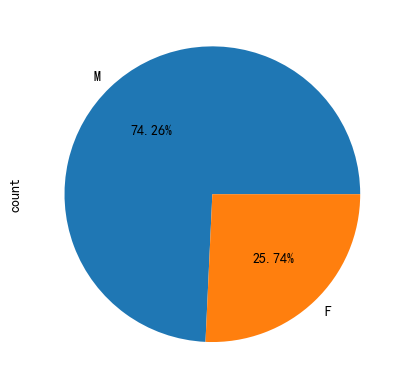

In [12]:
# 数据的探索
# 统计对电影评分的男性与女性的人数
# all_df['gender'].value_counts()
all_df['gender'].value_counts().plot(kind='pie',autopct='%.2f%%')

### 获取评分次数最多的前10个电影

In [13]:
# 通过使用 value_counts
# all_df['movie_title'].value_counts().sort_values(ascending=False).head(10)
# 通过使用 groupby + count
# all_df.groupby('movie_title')['movie_title'].count().sort_values(ascending=False).head(10)
# 通过使用 groupby + size
all_df.groupby('movie_title')['movie_title'].size().sort_values(ascending=False).head(10)

movie_title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: movie_title, dtype: int64

<Axes: xlabel='movie_title'>

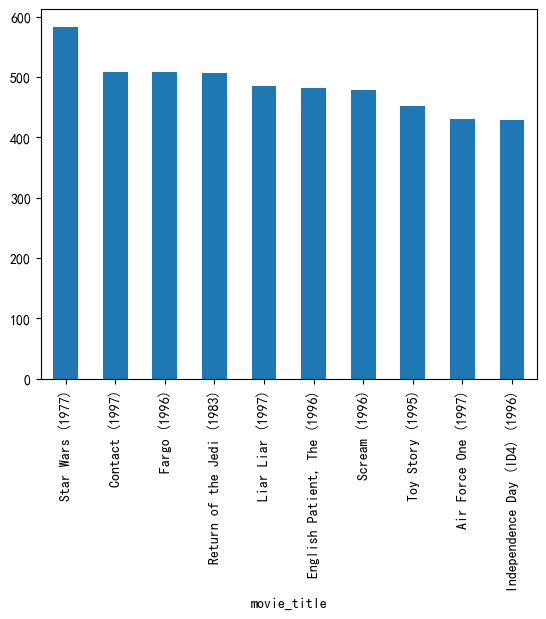

In [14]:
# 通过图表显示评分次数最多的前10部电影
all_df['movie_title'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')

### 获取评分最高前10的电影

In [15]:
# 通过评分的平均值，显示评分最高的前10部电影
# all_df.groupby('movie_title')['rating'].mean().sort_values(ascending=False).head(10)
all_df.groupby('movie_title').agg({'rating':'mean'})['rating'].sort_values(ascending=False).head(10)

movie_title
They Made Me a Criminal (1939)                       5.0
Marlene Dietrich: Shadow and Light (1996)            5.0
Saint of Fort Washington, The (1993)                 5.0
Someone Else's America (1995)                        5.0
Star Kid (1997)                                      5.0
Great Day in Harlem, A (1994)                        5.0
Aiqing wansui (1994)                                 5.0
Santa with Muscles (1996)                            5.0
Prefontaine (1997)                                   5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Name: rating, dtype: float64

In [16]:
# 获取对电影评分的人数
all_df.groupby('movie_title')['rating'].agg(['mean','count']).sort_values(by=['mean','count'],ascending=False).head(10)

,mean,count
movie_title,,
Prefontaine (1997),5.0,3
Star Kid (1997),5.0,3
"Saint of Fort Washington, The (1993)",5.0,2
Santa with Muscles (1996),5.0,2
Aiqing wansui (1994),5.0,1
Entertaining Angels: The Dorothy Day Story (1996),5.0,1
"Great Day in Harlem, A (1994)",5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
Someone Else's America (1995),5.0,1


In [17]:
# 过滤掉评分次数少于100次的电影
arg_100 = all_df.groupby('movie_title')['rating'].agg(['mean','count'])['count']>100

In [18]:
# 根据过滤条件获取数据
# all_df.groupby('movie_title')['rating'].agg(['mean','count'])[arg_100]
all_df.groupby('movie_title')['rating'].agg(['mean','count'])[arg_100].sort_values(by=['mean','count'],ascending=False).head(10)

,mean,count
movie_title,,
"Close Shave, A (1995)",4.491071,112
Schindler's List (1993),4.466443,298
"Wrong Trousers, The (1993)",4.466102,118
Casablanca (1942),4.456790,243
"Shawshank Redemption, The (1994)",4.445230,283
Rear Window (1954),4.387560,209
"Usual Suspects, The (1995)",4.385768,267
Star Wars (1977),4.358491,583
12 Angry Men (1957),4.344000,125


<Axes: title={'center': '评分最高的前10部电影'}, xlabel='movie_title'>

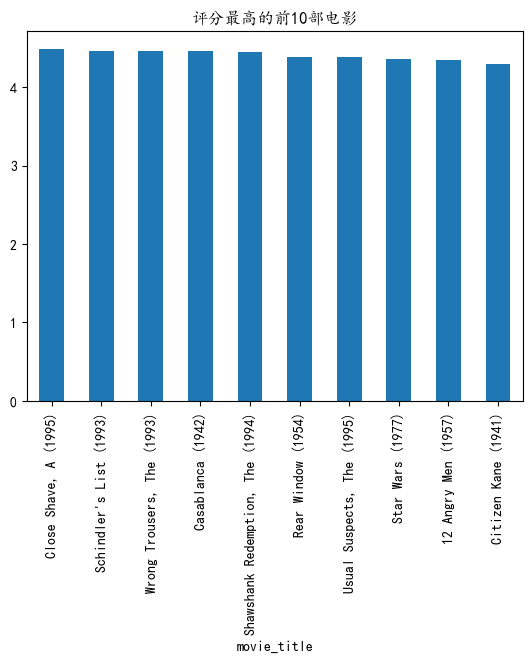

In [19]:
# 通过图表显示评分最高的前10部电影
top_10 = all_df.groupby('movie_title')['rating'].agg(['mean','count'])[arg_100].sort_values(by=['mean','count'],ascending=False).head(10)
top_10['mean'].plot(kind='bar',title='评分最高的前10部电影')

### 评分与不同年龄组的关系

In [20]:
# 获取分析数据的指标
# 创建不同年龄段的分组-了解年龄数据的分布情况
all_df['age'].describe()

count    100000.000000
mean         32.969850
std          11.562623
min           7.000000
25%          24.000000
50%          30.000000
75%          40.000000
max          73.000000
Name: age, dtype: float64

<Axes: ylabel='Frequency'>

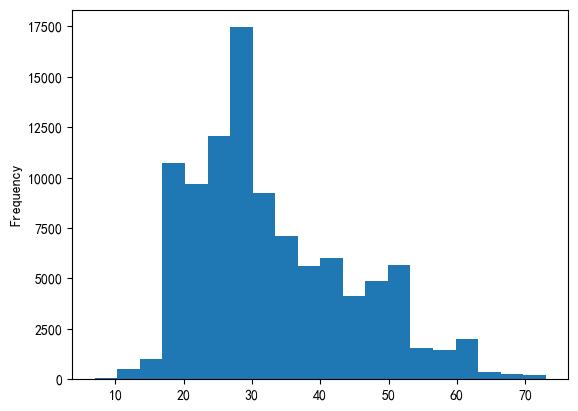

In [21]:
# 通过图表查看评分人数的分布
all_df['age'].plot(kind='hist',bins=20)

In [22]:
# 创建不同年龄段的分组-根据年龄情况进行分组
# age_bins = [0,10,20,30,40,50,60,70,80]
age_bins = np.arange(0,81,10)
# 根据分组切分数据
pd.cut(all_df['age'],bins=age_bins,right=False)

0        [20, 30)
1        [20, 30)
2        [20, 30)
3        [20, 30)
4        [20, 30)
           ...   
99995    [20, 30)
99996    [20, 30)
99997    [20, 30)
99998    [20, 30)
99999    [20, 30)
Name: age, Length: 100000, dtype: category
Categories (8, interval[int64, left]): [[0, 10) < [10, 20) < [20, 30) < [30, 40) < [40, 50) < [50, 60) < [60, 70) < [70, 80)]

In [23]:
# 将分组的数据添加到原始数据中
all_df['age_group'] = pd.cut(all_df['age'],bins=age_bins,right=False)
all_df[['age','age_group']]

,age,age_group
0,24,"[20, 30)"
1,24,"[20, 30)"
2,24,"[20, 30)"
3,24,"[20, 30)"
4,24,"[20, 30)"
...,...,...
99995,22,"[20, 30)"
99996,22,"[20, 30)"
99997,22,"[20, 30)"
99998,22,"[20, 30)"


In [24]:
# 根据age_group进行分组
all_df.groupby('age_group')['rating'].agg(['mean','count'])

C:\Users\伟力思\AppData\Local\Temp\ipykernel_784\2493832840.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_df.groupby('age_group')['rating'].agg(['mean','count'])


,mean,count
age_group,,
"[0, 10)",3.767442,43
"[10, 20)",3.486126,8181
"[20, 30)",3.467333,39535
"[30, 40)",3.554444,25696
"[40, 50)",3.591772,15021
"[50, 60)",3.635800,8704
"[60, 70)",3.648875,2623
"[70, 80)",3.649746,197


### 不同年龄段对某部电影的评分

In [25]:
# 获取每部电影不同年龄段的平均评分
all_df.groupby(['movie_title','age_group'])['rating'].mean()

C:\Users\伟力思\AppData\Local\Temp\ipykernel_784\1632542969.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_df.groupby(['movie_title','age_group'])['rating'].mean()


movie_title                         age_group
'Til There Was You (1997)           [0, 10)           NaN
                                    [10, 20)     1.000000
                                    [20, 30)     2.285714
                                    [30, 40)     4.000000
                                    [40, 50)          NaN
                                                   ...   
Á köldum klaka (Cold Fever) (1994)  [30, 40)          NaN
                                    [40, 50)          NaN
                                    [50, 60)     3.000000
                                    [60, 70)          NaN
                                    [70, 80)          NaN
Name: rating, Length: 13312, dtype: float64

In [26]:
# 转换格式的使用
all_df.groupby(['movie_title','age_group'])['rating'].mean().unstack().fillna(0)

C:\Users\伟力思\AppData\Local\Temp\ipykernel_784\3077649864.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_df.groupby(['movie_title','age_group'])['rating'].mean().unstack().fillna(0)


age_group,"[0, 10)","[10, 20)","[20, 30)","[30, 40)","[40, 50)","[50, 60)","[60, 70)","[70, 80)"
movie_title,,,,,,,,
'Til There Was You (1997),0.0,1.000000,2.285714,4.000000,0.000000,0.000000,0.0,0.0
1-900 (1994),0.0,0.000000,1.000000,3.666667,0.000000,0.000000,0.0,0.0
101 Dalmatians (1996),0.0,3.545455,2.648649,3.088235,2.950000,2.333333,2.0,0.0
12 Angry Men (1957),0.0,4.500000,4.230769,4.382353,4.500000,4.235294,4.4,0.0
187 (1997),0.0,3.333333,3.222222,2.200000,2.500000,3.333333,0.0,0.0
...,...,...,...,...,...,...,...,...
Young Guns II (1990),0.0,3.428571,2.857143,2.000000,2.000000,0.000000,0.0,0.0
"Young Poisoner's Handbook, The (1995)",0.0,4.000000,3.600000,2.800000,2.333333,3.750000,3.0,0.0
Zeus and Roxanne (1997),0.0,0.000000,3.000000,1.000000,2.333333,2.000000,0.0,0.0


In [27]:
# 获取评数量top100的电影
args = all_df['movie_id'].value_counts().sort_values(ascending=False).head(100)
args.index

Index([ 50, 258, 100, 181, 294, 286, 288,   1, 300, 121, 174, 127,  56,   7,
        98, 237, 117, 172, 222, 204, 313, 405,  79, 210, 151, 173,  69, 168,
       748, 269, 257, 195, 423,   9, 276, 318,  22, 302,  96, 328,  15, 118,
        25, 183, 216, 176,  64, 234, 202,  28, 191,  89, 111, 275,  12, 742,
       357,  82, 289, 135,  97, 238, 268, 546, 196, 333,  70, 186, 475, 153,
       132, 125, 228, 144, 483, 194, 323, 245, 185, 197,  11, 282, 496, 568,
       301, 655, 265, 182, 273, 143, 180, 179, 471, 161,  71,  95,   8, 678,
       427, 322],
      dtype='int64', name='movie_id')

In [28]:
# 通过数据筛选isin来获取数据
# all_df[all_df['movie_id'].isin(args.index)]
all_df[all_df['movie_id'].isin(args.index)].groupby(['movie_title','age_group'])['rating'].mean().unstack().fillna(0)

C:\Users\伟力思\AppData\Local\Temp\ipykernel_784\3309948668.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_df[all_df['movie_id'].isin(args.index)].groupby(['movie_title','age_group'])['rating'].mean().unstack().fillna(0)


age_group,"[0, 10)","[10, 20)","[20, 30)","[30, 40)","[40, 50)","[50, 60)","[60, 70)","[70, 80)"
movie_title,,,,,,,,
2001: A Space Odyssey (1968),5.0,4.100000,3.924731,3.887500,4.093023,4.000000,4.285714,0.000000
Air Force One (1997),0.0,3.647059,3.666667,3.570000,3.555556,3.750000,3.666667,3.666667
Aladdin (1992),0.0,3.840000,3.820000,3.847458,3.769231,3.571429,3.500000,0.000000
Alien (1979),0.0,4.111111,4.026087,4.103448,3.833333,4.272727,3.500000,4.000000
Aliens (1986),0.0,4.050000,4.087719,3.887640,3.526316,4.235294,3.800000,3.000000
...,...,...,...,...,...,...,...,...
"Usual Suspects, The (1995)",0.0,4.450000,4.416667,4.400000,4.466667,4.150000,3.857143,0.000000
Volcano (1997),2.0,2.842105,2.831325,2.617021,2.871795,3.000000,2.900000,3.000000
When Harry Met Sally... (1989),0.0,3.500000,4.000000,3.882353,3.825000,3.904762,3.800000,4.500000


In [29]:
# 通过索引的方式获取数据
# all_df.set_index('movie_id').loc[args.index]
all_df.set_index('movie_id').loc[args.index].groupby(['movie_title','age_group'],observed=True)['rating'].mean().unstack().fillna(0)

age_group,"[0, 10)","[10, 20)","[20, 30)","[30, 40)","[40, 50)","[50, 60)","[60, 70)","[70, 80)"
movie_title,,,,,,,,
2001: A Space Odyssey (1968),5.0,4.100000,3.924731,3.887500,4.093023,4.000000,4.285714,0.000000
Air Force One (1997),0.0,3.647059,3.666667,3.570000,3.555556,3.750000,3.666667,3.666667
Aladdin (1992),0.0,3.840000,3.820000,3.847458,3.769231,3.571429,3.500000,0.000000
Alien (1979),0.0,4.111111,4.026087,4.103448,3.833333,4.272727,3.500000,4.000000
Aliens (1986),0.0,4.050000,4.087719,3.887640,3.526316,4.235294,3.800000,3.000000
...,...,...,...,...,...,...,...,...
"Usual Suspects, The (1995)",0.0,4.450000,4.416667,4.400000,4.466667,4.150000,3.857143,0.000000
Volcano (1997),2.0,2.842105,2.831325,2.617021,2.871795,3.000000,2.900000,3.000000
When Harry Met Sally... (1989),0.0,3.500000,4.000000,3.882353,3.825000,3.904762,3.800000,4.500000
